In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [3]:
train = pd.read_csv('~/Desktop/IDAO/data/train.csv')
test = pd.read_csv('~/Desktop/IDAO/data/test.csv')
train.epoch = pd.to_datetime(train.epoch)
test.epoch = pd.to_datetime(test.epoch)
train.epoch = train.epoch.apply(datetime.timestamp)
test.epoch = test.epoch.apply(datetime.timestamp)

test.epoch = test.epoch - np.min(train.epoch)
train.epoch = train.epoch - np.min(train.epoch)

In [4]:
%matplotlib notebook
train.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,0.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2803.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,5606.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,8409.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,11212.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [277]:
ddi = train.loc[train['sat_id'] == 587]
ddi.tail()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
633756,1202125,2674466.834,587,-1488.591642,-13517.295688,-8089.100521,4.417639,2.283310,-0.658697,-9202.002156,-14274.428046,-4150.081043,3.721406,-1.014955,-2.413504
633757,1202126,2675306.805,587,2228.897536,-11090.605026,-8313.865777,4.368465,3.528298,0.177234,-5856.646486,-14734.377607,-6046.979822,4.214836,-0.061008,-2.077135
633758,1202127,2676146.776,587,5692.708685,-7545.699699,-7685.850197,3.748976,4.922682,1.388175,-2178.409214,-14348.454514,-7594.881508,4.503974,0.993867,-1.580941
633759,1202128,2676986.747,587,8230.907661,-2869.568209,-5869.576911,2.072837,6.118921,2.984005,1634.220746,-13048.336525,-8656.453763,4.523006,2.106239,-0.919262
633760,1202129,2677826.717,587,8785.686309,2409.983227,-2694.870076,-0.935438,6.153171,4.469289,5323.985871,-10814.566846,-9095.407153,4.199533,3.201247,-0.102216


In [278]:
tti = test.loc[test['sat_id'] == 587]
tti.head()

,id,sat_id,epoch,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
274486,1202130,587,2678666.688,8575.583512,-7707.403193,-8795.459704,3.471935,4.162945,0.830072
274487,1202131,587,2679506.659,11037.851899,-3901.467351,-7691.980586,2.323421,4.837378,1.792829
274488,1202132,587,2680346.629,12379.917802,293.317331,-5811.796233,0.825995,5.064738,2.654759
274489,1202133,587,2681186.600,12378.422367,4452.541918,-3302.846005,-0.836624,4.744828,3.266448
274490,1202134,587,2682026.571,11000.278374,8116.593534,-426.401866,-2.407563,3.901481,3.517919


In [267]:
len(tti)

3800

<IPython.core.display.Javascript object>


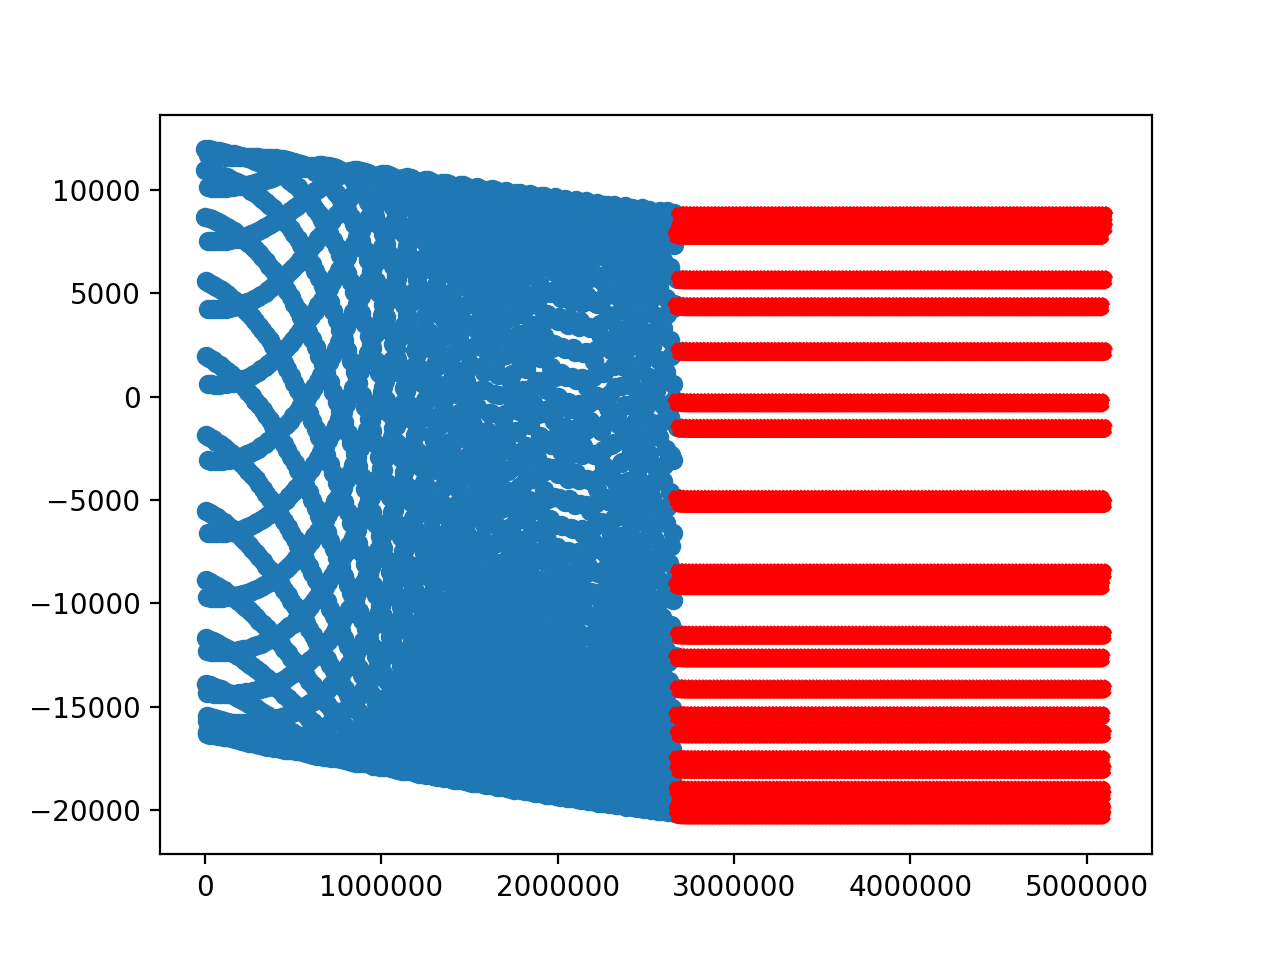

In [285]:
i = 3
subm = tti.rename(columns={'x_sim':'x', 'y_sim': 'y', 'z_sim': 'z','Vx_sim': 'Vx', 'Vy_sim':'Vy', 'Vz_sim': 'Vz'})
subm = subm.drop(columns={'epoch', 'sat_id'})
#, 'y', 'z', 'Vx', 'Vy', 'Vz'
for coord in ['x']:
    model37 = SARIMAX([x for x in ddi[coord]], order=(1,0,0), seasonal_order = (0, 1, 0, 24))
    model_fit37 = model37.fit(disp=0)
    output37 = model_fit37.forecast(steps = len(tti))
    
    subm[coord] = output37
    
    plt.figure(i+1)
    pyplot.scatter(ddi['epoch'], ddi[coord])
    pyplot.scatter(tti['epoch'], output37, color='red', linestyle = 'dashed')
    pyplot.show()
    i += 1

In [173]:
model37 = SARIMAX([x for x in ddi['Vx']], order=(4,1,2), seasonal_order = (0, 1, 0, 24), trend='t')
model_fit37 = model37.fit(disp=0)
output37 = model_fit37.forecast(steps = 1963)

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>


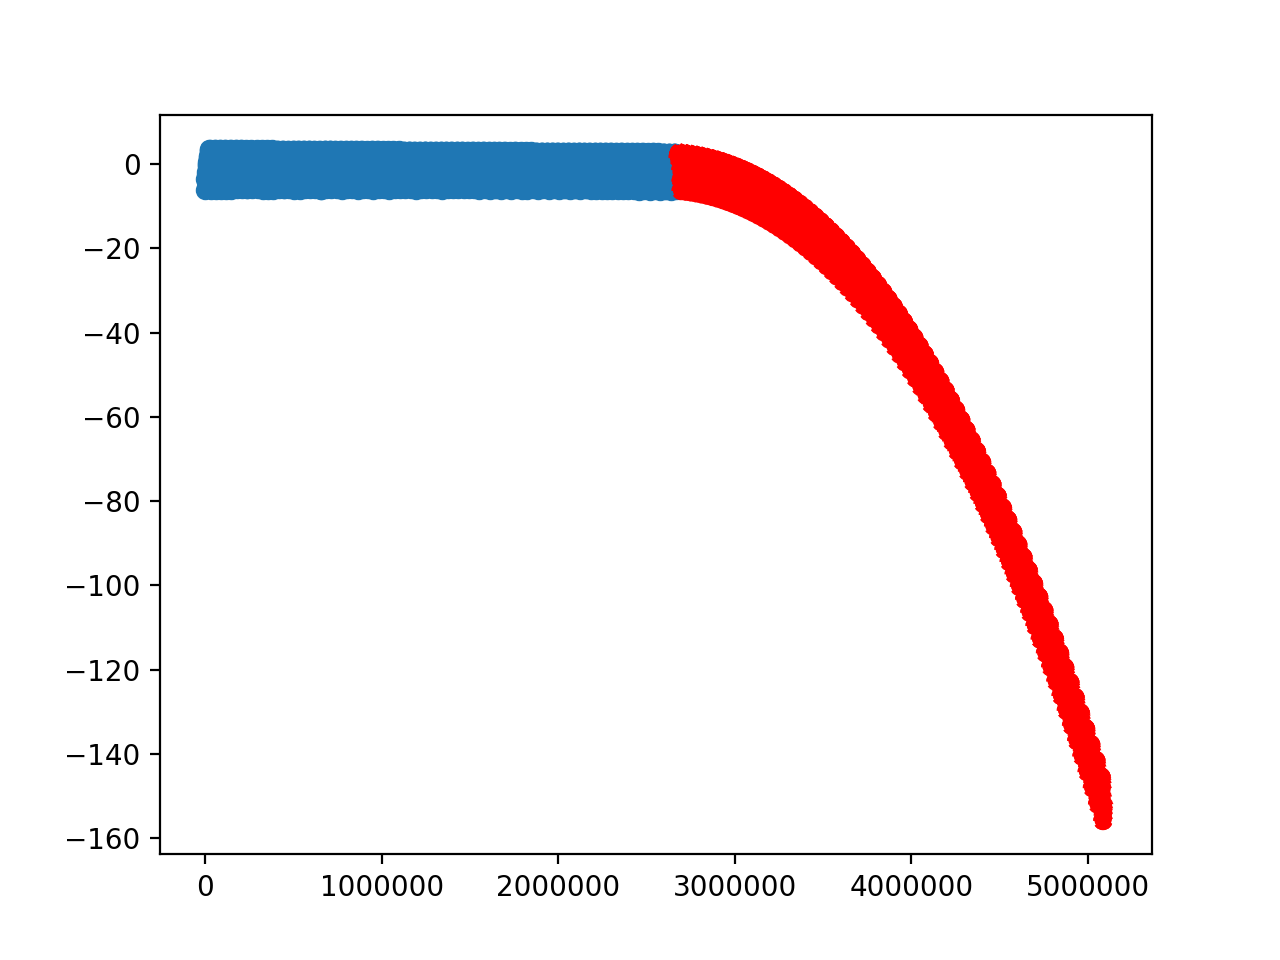

In [174]:
plt.figure(3)
pyplot.scatter(ddi['epoch'], ddi['Vx'])
pyplot.scatter(tti['epoch'], output37, color='red', linestyle = 'dashed')
pyplot.show()

In [286]:
sub = pd.read_csv("submission.csv")
sub.loc[sub.id.isin(tti.id),['x']] = subm[['x']].values
sub[['id','x','y','z','Vx','Vy','Vz']].to_csv('submission.csv', index=None)

In [288]:
#subm = subm.drop(columns={'epoch', 'sat_id'})
sub = pd.read_csv("submission.csv")
print(sub.loc[sub.id.isin(tti.id),['x']])
print(subm[['x']])

                   x
281191   7834.194423
281192   4385.083498
281193   -262.912464
281194  -4939.979959
281195  -9110.637244
281196 -12606.365771
281197 -15402.863395
281198 -17524.131234
281199 -19007.011570
281200 -19888.611001
281201 -20202.216772
281202 -19976.410287
281203 -19235.425721
281204 -18000.077513
281205 -16289.126171
281206 -14121.277953
281207 -11518.373834
281208  -8510.957342
281209  -5148.744678
281210  -1521.501764
281211   2197.646680
281212   5663.033437
281213   8202.728583
281214   8758.927966
281215   7808.785185
281216   4360.955345
281217   -285.824121
281218  -4961.736454
281219  -9131.296818
281220 -12625.983729
...              ...
284041  -5162.826447
284042  -1534.873557
284043   2184.949067
284044   5650.976013
284045   8191.279072
284046   8748.055718
284047   7798.461094
284048   4351.151775
284049   -295.133413
284050  -4970.576389
284051  -9139.691061
284052 -12633.954750
284053 -15429.061390
284054 -17549.008376
284055 -19030.634454
284056 -19911

<IPython.core.display.Javascript object>


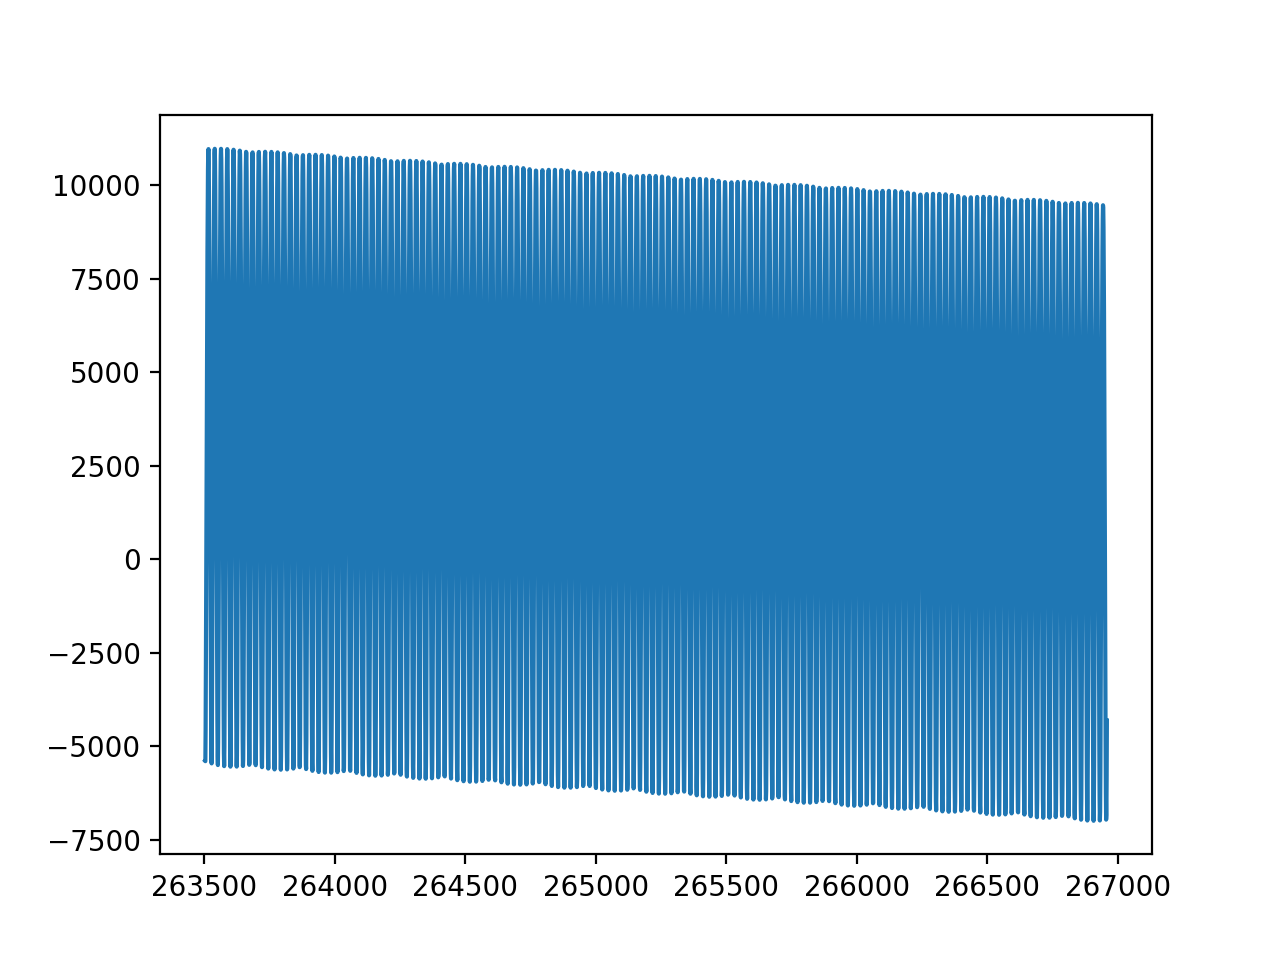

In [245]:
sub = pd.read_csv("submission.csv")
idx = []
for i in sub.id:
    idx.append(i in np.array(tti.id))
plt.figure(10)
plt.plot(sub.loc[idx].x)

In [36]:
X = ddi['x']
size = int(len(X) * 0.66)
train1, test1 = X[0:size], X[size:len(X)]
history = [x for x in train1]
predictions = list()
TST = [x for x in test1]

<IPython.core.display.Javascript object>


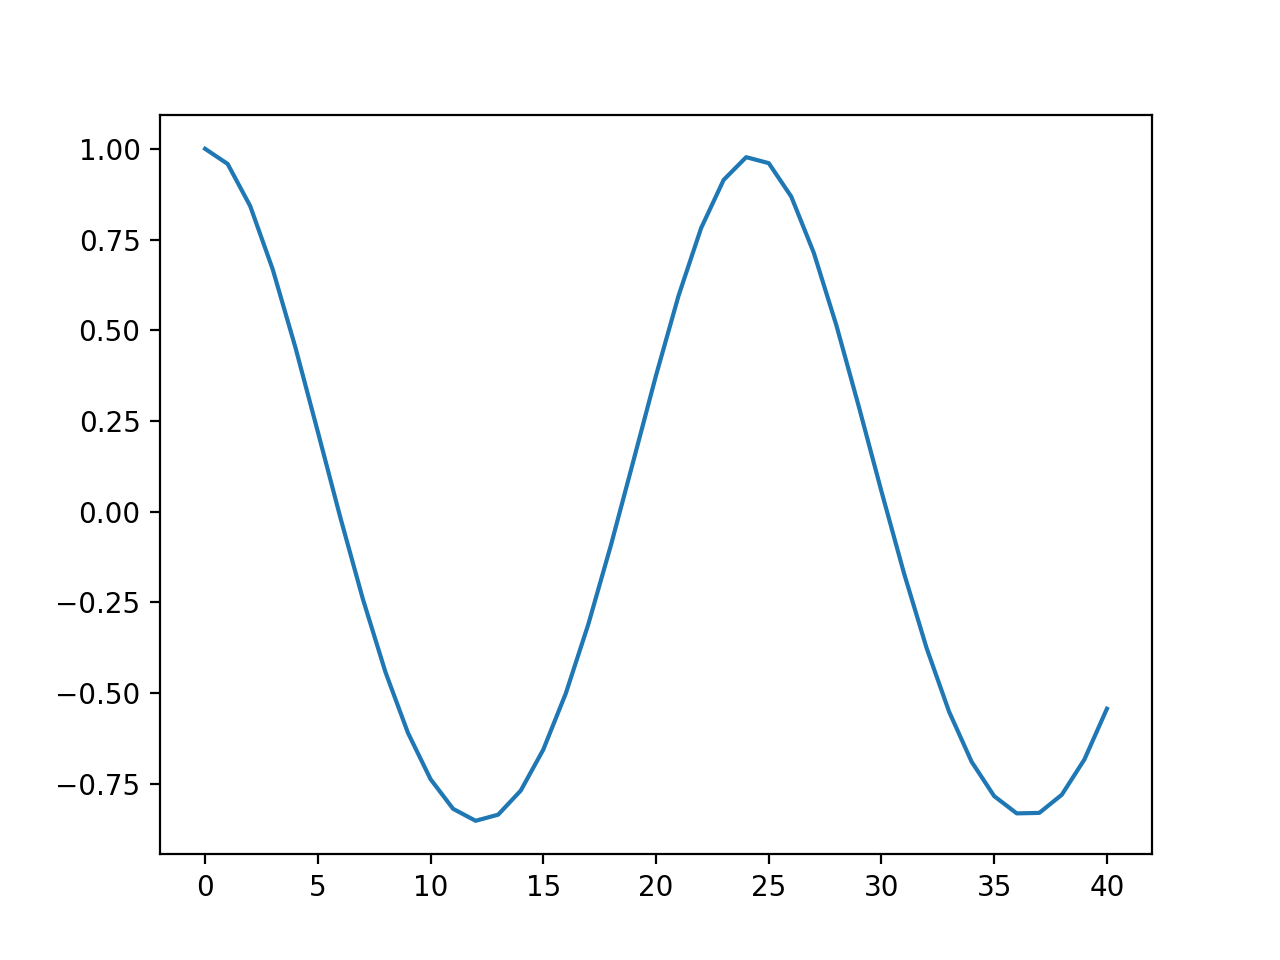

In [39]:
plt.figure(0)
plt.plot(acf(history))

In [31]:
model = SARIMAX(history[-24*5:], order=(2,0,0), seasonal_order = (0, 1, 0, 24))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps = 24*5)

In [32]:
output

array([-17051.96147238, -20911.47587307, -23221.32489981, -24349.46680814,
       -24619.32875792, -24233.70812654, -23301.08334758, -21880.41819842,
       -20012.41091691, -17734.18939341, -15084.08798378, -12102.93400338,
        -8835.97655237,  -5337.49480238,  -1678.50729175,   2037.76632955,
         5646.43247205,   8860.85334775,  11147.80241088,  11511.23173715,
         8535.25604175,   2116.15144544,  -5235.98503359, -11544.97724704,
       -17051.96161526, -20911.47584647, -23221.32483797, -24349.46676463,
       -24619.32873936, -24233.70812341, -23301.08335018, -21880.41820144,
       -20012.41091867, -17734.18939402, -15084.08798379, -12102.93400321,
        -8835.97655223,  -5337.49480231,  -1678.50729173,   2037.76632955,
         5646.43247204,   8860.85334775,  11147.80241088,  11511.23173715,
         8535.25604175,   2116.15144544,  -5235.98503359, -11544.97724704,
       -17051.96161526, -20911.47584647, -23221.32483797, -24349.46676463,
       -24619.32873936, -

In [33]:
history[-24*5:]

[-22984.663436856157,
 -24258.96376518731,
 -24771.85113766902,
 -24620.83567432427,
 -23882.94512507724,
 -22620.41898115186,
 -20885.024651557767,
 -18721.46211641029,
 -16170.3094765609,
 -13270.93961645234,
 -10064.82532372743,
 -6600.856477612487,
 -2942.998763833756,
 816.2196860014475,
 4529.0072452118575,
 7937.6780071773255,
 10558.29469643353,
 11459.871270575892,
 9177.79858358009,
 3197.406329496557,
 -4164.470503078159,
 -10670.56982334723,
 -15748.75280447354,
 -19490.0547188901,
 -22094.1760458961,
 -23740.152794621717,
 -24569.784440776166,
 -24693.19267027079,
 -24196.681488491547,
 -23149.2412752597,
 -21607.48896380779,
 -19619.468935014767,
 -17227.78515211046,
 -14472.5115025321,
 -11394.22676288031,
 -8038.323368480495,
 -4461.517718539272,
 -741.8759465198325,
 3001.530001542447,
 6569.746203034402,
 9602.223729156121,
 11408.30424786615,
 10739.9735999736,
 6314.923957829113,
 -798.6153980544557,
 -7854.962822874326,
 -13596.25426669007,
 -17921.17401834142,
 -2

In [ ]:
for t in range(len(test)):  #we make a model for each value, training it with all previous values
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

<IPython.core.display.Javascript object>


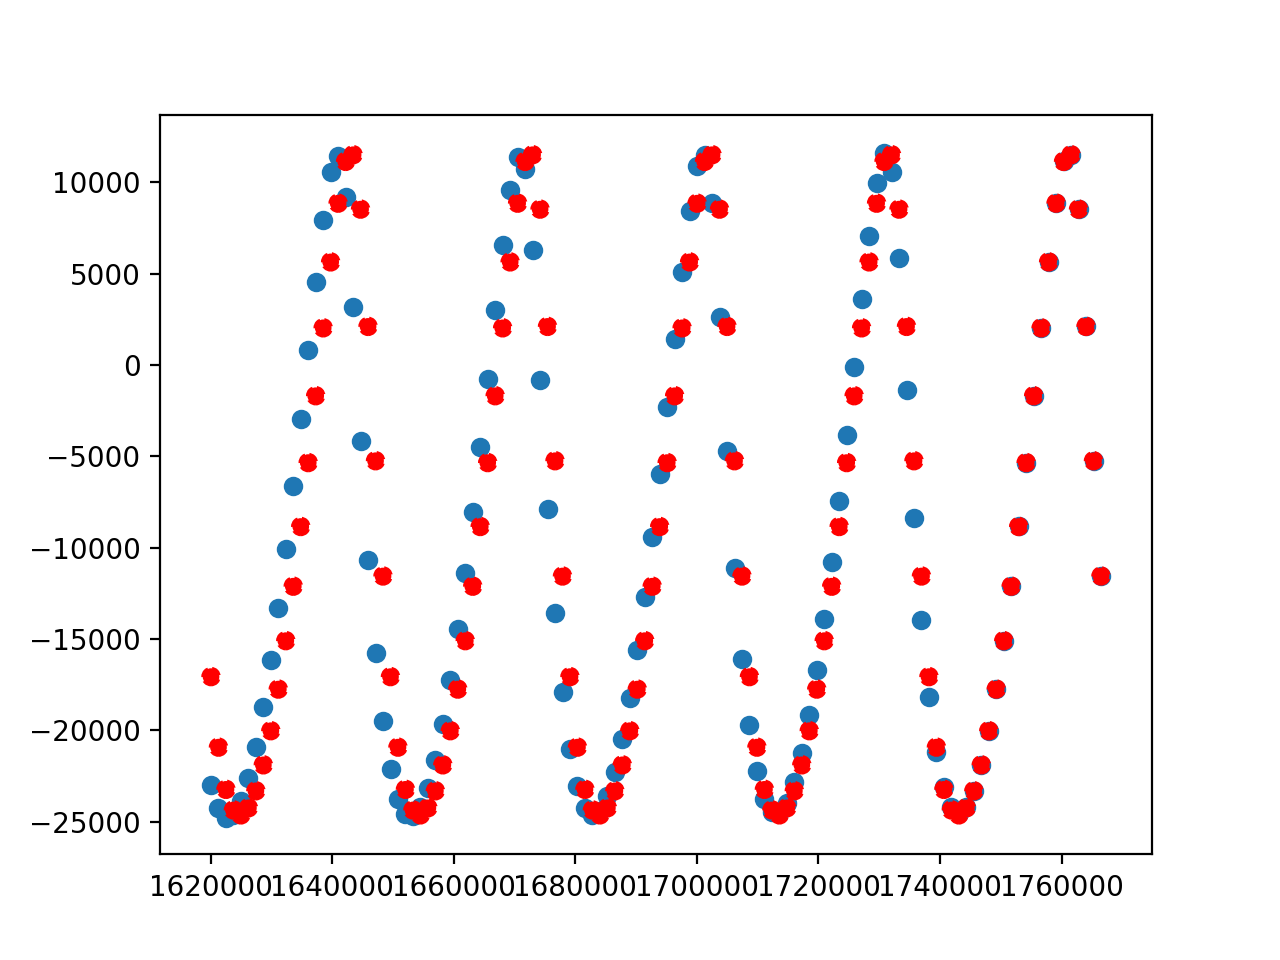

In [48]:
plt.figure(1)
pyplot.scatter(ddi['epoch'][0:size][-24*5:], history[-24*5:])
pyplot.scatter(ddi['epoch'][0:size][-24*5:], output, color='red', linestyle = 'dashed')
pyplot.show()

<IPython.core.display.Javascript object>


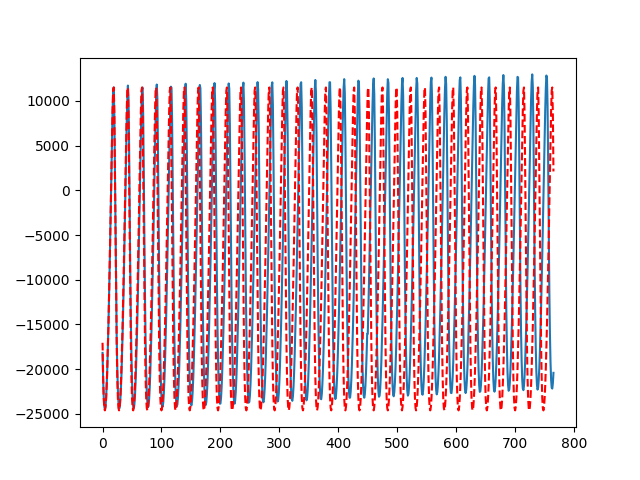

In [173]:
TST = [x for x in test1]
output2 = model_fit.forecast(steps = 24+len(TST))

pyplot.plot(history[-24:]+TST)
pyplot.plot(output2, color='red', linestyle = 'dashed')
pyplot.show()

Now lets see satelite 37

In [38]:
train.head()

246776     6567.099955
246777     3904.693214
246778    -1358.056949
246779    -6497.279154
246780   -11025.076107
Name: x, dtype: float64

In [92]:
traini = train.loc[train['sat_id'] == 37]
testi = test.loc[test['sat_id'] == 37]

TR = traini['x']
TE  = testi['x_sim']

history = [x for x in TR]

#model = ARIMA(history, order=(10,1,0))
#model_fit = model.fit(disp = 0)
forecast = forecast = model_fit.forecast(steps=len(TE))[0]

KeyError: 'sat_id'

In [37]:
#pyplot.plot(history)
forecast = forecast = model_fit.forecast(steps=len(TE))[0]
pyplot.plot(forecast, color='red')
pyplot.show()

NameError: name 'TE' is not defined